<a href="https://colab.research.google.com/github/vup7bv/project_chd/blob/main/Project_2_CHD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Millie Pandya (vup7bv) and Michael McGeachy (mjm2xmm)

# Summary

This project sought to examine the relationship between the ten year risk of coronary heart disease, and the following input variables: sex, age, education, current smoking status, number of cigarettes a day, use of anti-hypertensive medication at time of exam, prevalent stroke, prevalent hypertension, diabetes, total cholesterol, systolic blood pressure, diastolic blood pressure, body mass index, heart rate and glucose. To do this, all empty values were first cleaned from the training dataset, and then this was fed into a decision tree model based upon its perceived advantages over a linear model. This model would then be used to analyze a new set of test data, from which statistics on accuracy and R^2 were to be collected on each iteration. After a series of iterations and an attempt at k-means clustering, it was discovered that the model with the highest R^2 of .0841 had a max depth of four and a minimum size of seven. This eventual outcome was below the .10 threshold we sought to overcome to prove the superiority of the decision tree model over a hypothetical linear model.

### Importing necessary packages:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the data and taking out rows with any "NaN" or missing values:

In [ ]:
# First, the training data:
TrainDF = pd.read_csv("/fhs_train.csv", low_memory=False)
TrainDF = TrainDF.dropna()
TrainDF = TrainDF.reset_index(drop=True)

# Now, the testing data:
TestDF = pd.read_csv("/fhs_test.csv", low_memory=False)
TestDF = TestDF.dropna()
TestDF = TestDF.reset_index(drop=True)

# We can also drop the first (unnamed) columns from each dataframe, which carry no use for us:
TrainDF = TrainDF.drop(["Unnamed: 0"], axis=1)
TestDF = TestDF.drop(["Unnamed: 0"], axis=1)

# We can print the training data to see any obvious issues:
print(TrainDF)

      sex  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0       1   58        1.0              0         0.0     0.0                0   
1       0   40        1.0              1        15.0     0.0                0   
2       1   38        2.0              1        43.0     0.0                0   
3       0   43        1.0              0         0.0     0.0                0   
4       0   54        1.0              0         0.0     0.0                0   
...   ...  ...        ...            ...         ...     ...              ...   
2739    0   54        2.0              0         0.0     0.0                0   
2740    1   36        4.0              0         0.0     0.0                0   
2741    1   47        1.0              1        20.0     0.0                0   
2742    1   52        2.0              0         0.0     0.0                0   
2743    0   48        1.0              1         5.0     0.0                0   

      prevalentHyp  diabete

# Data Modeling

Our project utilizes data from the Framingham Heart Study to analyze the link between the input variables and an individual’s ultimate 10 year risk of coronary heart disease. Our initial attempt utilized all fifteen input variables: sex, age, education, current smoking status, number of cigarettes a day, use of anti-hypertensive medication at time of exam, prevalent stroke, prevalent hypertension, diabetes, total cholesterol, systolic blood pressure, diastolic blood pressure, body mass index, heart rate and glucose. This was initially selected given a desire to feed as much information as possible into the model, and then determine its accuracy.

The first step in cleaning our data was the removal of all empty values from the dataset, including the first column that was left blank. This choice was necessary to streamline the dataset and allow the model to function correctly, with overall integrity still being guaranteed by the over 2700 data points that remained.


 For this problem, we ultimately wanted a supervised model/algorithm, since we are attempting to predict a specific ‘outcome’ - the ten year risk of coronary heart disease. Since our input variables to the model fall in distinct numerical ranges, each with their own potentially contribution to the outcome, we have little reason to expect that a multidimensional distance-based model, such as a 𝑘 nearest neighbors algorithm, would be a useful predictive tool (the "distances" in this case don't really mean anything). Given that we had no reason to expect a linear relationship between these input factors and our eventual outcome, the 10 year risk of CHD, the choice was made to attempt modeling via decision trees over using a linear model. This choice was reinforced given that decision trees are partiucularly useful for binary outcomes, like our 10 year CHD.


[Text(0.5527492460860638, 0.9814814814814815, 'x[1] <= 55.5\nsquared_error = 0.131\nsamples = 2744\nvalue = 0.155'),
 Text(0.2935585807169133, 0.9444444444444444, 'x[1] <= 46.5\nsquared_error = 0.096\nsamples = 1988\nvalue = 0.108'),
 Text(0.1456069809222346, 0.9074074074074074, 'x[9] <= 398.5\nsquared_error = 0.063\nsamples = 1147\nvalue = 0.068'),
 Text(0.1428693643596544, 0.8703703703703703, 'x[4] <= 9.5\nsquared_error = 0.062\nsamples = 1145\nvalue = 0.066'),
 Text(0.07265377705535118, 0.8333333333333334, 'x[10] <= 199.75\nsquared_error = 0.034\nsamples = 599\nvalue = 0.035'),
 Text(0.06991616049277098, 0.7962962962962963, 'x[14] <= 233.5\nsquared_error = 0.032\nsamples = 598\nvalue = 0.033'),
 Text(0.06717854393019078, 0.7592592592592593, 'x[11] <= 59.25\nsquared_error = 0.031\nsamples = 597\nvalue = 0.032'),
 Text(0.050047052784669345, 0.7222222222222222, 'x[10] <= 139.0\nsquared_error = 0.222\nsamples = 3\nvalue = 0.333'),
 Text(0.04730943622208914, 0.6851851851851852, 'squared_

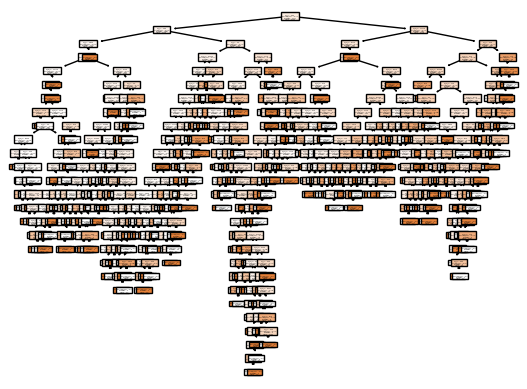

In [ ]:
# We can now roughly follow the methods presented in "trees.ipynb". First, we can use a decision tree regressor
# without any additional parameters:

from sklearn.tree import DecisionTreeRegressor # Import the tree regressor
from sklearn.tree import plot_tree # Import the tree regressor

# Process data:
y = TrainDF['TenYearCHD']
X = TrainDF.drop(['TenYearCHD'], axis=1)

# Fit decision tree:
cart = DecisionTreeRegressor() # Create a regressor object
cart = cart.fit(X, y) # Fit the regressor

# Visualize results:
plot_tree(cart,filled=True)

In [ ]:
# We can also test this regressor on the testing data:

X_test = TestDF.drop(['TenYearCHD'], axis=1)
y_test = TestDF['TenYearCHD']

## Make Predictions on the Test Set
y_hat = cart.predict(X_test)

## Confusion Matrix
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0]) # Compute Accuracy
#acc = np.trace(tab)/np.sum(np.sum(tab,axis=0)) # Faster way to compute accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

SSE = np.sum((y_test - y_hat)**2)
TSS = np.sum((y_test - np.mean(y))**2)
rsq = 1 - SSE/TSS
print('R^2: ' + str(rsq) + '\n')

Accuracy:  0.7680525164113785 

R^2: -0.8642161234860655



We can see that we get an accuracy of about $77.0\%$. However, from the picture of the tree, we can also see that we may be overfitting the data, and creating a tree with too large of a depth, and with terminal nodes that are too pure or too small. To rectify this, we can impose a few different sets of bounds on the terminal node sizes and the maximum tree depth, and see which performs the best:

In [ ]:
max_depths = [3, 4, 5, 6, 8, 10, 15, 20]
min_sizes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for mdepth in max_depths:
    for msize in min_sizes:
        print("Max. depth = " + str(mdepth))
        print("Min. size = " + str(msize))

        cart = DecisionTreeRegressor(max_depth=mdepth, min_samples_leaf=msize) # Create a regressor object
        cart = cart.fit(X, y) # Fit the regressor

        y_hat = cart.predict(X_test)

        ## Confusion Matrix
        tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
        acc = (tab.iloc[0,0]+tab.iloc[1,1])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0]) # Compute Accuracy
        #acc = np.trace(tab)/np.sum(np.sum(tab,axis=0)) # Faster way to compute accuracy
        print('Accuracy: ', acc, '\n')

        SSE = np.sum((y_test - y_hat)**2)
        TSS = np.sum((y_test - np.mean(y))**2)
        rsq = 1 - SSE/TSS
        print('R^2: ' + str(rsq) + '\n')

Max. depth = 3
Min. size = 1
Accuracy:  0.6936936936936937 

R^2: 0.06161407743229941

Max. depth = 3
Min. size = 2
Accuracy:  0.6936936936936937 

R^2: 0.06161407743229941

Max. depth = 3
Min. size = 3
Accuracy:  0.5216284987277354 

R^2: 0.07603710633346761

Max. depth = 3
Min. size = 4
Accuracy:  0.5216284987277354 

R^2: 0.07603710633346761

Max. depth = 3
Min. size = 5
Accuracy:  0.5216284987277354 

R^2: 0.07597505996961429

Max. depth = 3
Min. size = 6
Accuracy:  0.5216284987277354 

R^2: 0.07597505996961429

Max. depth = 3
Min. size = 7
Accuracy:  0.5216284987277354 

R^2: 0.07597505996961429

Max. depth = 3
Min. size = 8
Accuracy:  0.5216284987277354 

R^2: 0.07597505996961429

Max. depth = 3
Min. size = 9
Accuracy:  0.5216284987277354 

R^2: 0.07149518317499903

Max. depth = 3
Min. size = 10
Accuracy:  0.5216284987277354 

R^2: 0.07192624074369891

Max. depth = 4
Min. size = 1
Accuracy:  0.5844875346260388 

R^2: 0.06904447714950113

Max. depth = 4
Min. size = 2
Accuracy:  0.

From our first attempt at modeling we arrived at an accuracy of about 77%, but a R^2 of  -.864. Following this result, we determined that we might be overfitting the data within the model. This was evidenced by the pictured tree having too great of depth, and ending in terminal nodes that were too pure or small. In an attempt to improve upon the model, we made the choice to impose a series of bounds on the terminal node sizes and maximum tree depth to determine what arrangement performed the best. This step’s resultant confusion matrices yielded a maximum R^2 of .0814 at an accuracy of 54% when setting a max depth of 4 and a minimum size of 7. This improvement in R^2 was likely caused by the limitations preventing the model from being overly specific to the training model data, allowing it to better process the new data being fed into it.

After achieving relatively low marks in our first attempts at modeling, we considered that the sheer number of input parameters, at 15, might be responsible for the questionable efficacy of our decision tree. If there were some hidden relationships between the various parameters, discovering them, and subsequently combining them, could be an effective way to reduce the input variable space in our model without sacrificing accuracy of our model. Otherwise, it is likely that the excessive number of parameters is encouraging the model to overfit the training data’s trends, and thus struggle to translate itself to the new data.

With this in mind, we used a k means clustering algorithm to try and find any of these hidden relationships. In theory, this method would allow us to condense the data into a series of clusters, compute the cluster centroids, and then re-input that into the model. In practice, this means a k set equal to five would bring our number of ‘inputs’ to just five, a marked decrease from the original fifteen.

In [ ]:
from sklearn.cluster import KMeans # Import kmc

def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

# Preprocess the data:
X = TrainDF.loc[:, ['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',\
                   'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP',\
                   'BMI', 'heartRate', 'glucose']] # Select data to cluster
X = X.apply(maxmin) # Normalize the data

In [ ]:
initial_centroids = np.random.uniform(low=0,high=1,size=5) # Determine initial centroids
model = KMeans(n_clusters=5, max_iter=1000, init = X.iloc[initial_centroids,:],  random_state=0) # Pass centroids and options into the model
model = model.fit(X) # Initialize a kmc model
#TrainDF['g_hat'] = model.predict(X) # Predict values

centers = model.cluster_centers_ # Get the computed centers for the kmc model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# We can now compute our new input parameters by computing the distances to each of these 5 centroids:

# Returning the distance between two points:
def PointDistance(point1, point2):
    return np.sqrt(np.sum(np.power(point1 - point2, 2)))

# Creating a new dataframe for our training and testing datasets based on distances to these centroids:
NewTrainDF = pd.DataFrame(columns=['C1', 'C2', 'C3', 'C4', 'C5', 'TenYearCHD'])
NewTestDF = pd.DataFrame(columns=['C1', 'C2', 'C3', 'C4', 'C5', 'TenYearCHD'])

NewTrainDF['TenYearCHD'] = TrainDF['TenYearCHD']
NewTestDF['TenYearCHD'] = TestDF['TenYearCHD']

for i in range(len(NewTrainDF)):
    theTrainPoint = np.array(X.iloc[i])
    C1 = PointDistance(theTrainPoint, centers[0])
    C2 = PointDistance(theTrainPoint, centers[1])
    C3 = PointDistance(theTrainPoint, centers[2])
    C4 = PointDistance(theTrainPoint, centers[3])
    C5 = PointDistance(theTrainPoint, centers[4])

    NewTrainDF.loc[i, 'C1'] = C1
    NewTrainDF.loc[i, 'C2'] = C2
    NewTrainDF.loc[i, 'C3'] = C3
    NewTrainDF.loc[i, 'C4'] = C4
    NewTrainDF.loc[i, 'C5'] = C5


X2 = TestDF.loc[:, ['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',\
                   'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP',\
                   'BMI', 'heartRate', 'glucose']] # Select data to cluster
X2 = X2.apply(maxmin) # Normalize the data

for i in range(len(NewTestDF)):
    theTestPoint = np.array(X2.iloc[i])
    C1 = PointDistance(theTestPoint, centers[0])
    C2 = PointDistance(theTestPoint, centers[1])
    C3 = PointDistance(theTestPoint, centers[2])
    C4 = PointDistance(theTestPoint, centers[3])
    C5 = PointDistance(theTestPoint, centers[4])

    NewTestDF.loc[i, 'C1'] = C1
    NewTestDF.loc[i, 'C2'] = C2
    NewTestDF.loc[i, 'C3'] = C3
    NewTestDF.loc[i, 'C4'] = C4
    NewTestDF.loc[i, 'C5'] = C5

In [ ]:
print(NewTrainDF)

            C1        C2        C3        C4        C5  TenYearCHD
0     0.942424   1.08051  1.502149  1.786784  1.450452           1
1     0.781442  1.830115  1.493605  1.135918  1.545544           0
2     1.417155   1.30478  0.579983  1.227133   1.67005           0
3     0.813138  1.494637  1.808442  1.504362  1.125981           0
4     1.365262  1.100094  1.510768  1.101786  0.365165           0
...        ...       ...       ...       ...       ...         ...
2739  1.308145  1.065197  1.496945  1.076979  0.340029           0
2740  1.089976  1.295961  1.676234  1.950252  1.715577           0
2741   0.84091  1.500203  1.055816  1.468817  1.800183           0
2742  0.824509  1.031675  1.471669  1.763221  1.446954           1
2743  0.753084  1.803261  1.500883  1.113283  1.498667           0

[2744 rows x 6 columns]


Now, we can apply the decision trees algorithm from earlier, but with this smaller set of input variables:

[Text(0.6101190476190477, 0.9166666666666666, 'x[0] <= 1.353\nsquared_error = 0.131\nsamples = 2744\nvalue = 0.155'),
 Text(0.375, 0.75, 'x[0] <= 0.837\nsquared_error = 0.102\nsamples = 2278\nvalue = 0.115'),
 Text(0.19047619047619047, 0.5833333333333334, 'x[2] <= 1.514\nsquared_error = 0.07\nsamples = 968\nvalue = 0.075'),
 Text(0.09523809523809523, 0.4166666666666667, 'x[4] <= 1.451\nsquared_error = 0.099\nsamples = 493\nvalue = 0.112'),
 Text(0.047619047619047616, 0.25, 'x[4] <= 1.441\nsquared_error = 0.237\nsamples = 13\nvalue = 0.385'),
 Text(0.023809523809523808, 0.08333333333333333, 'squared_error = 0.0\nsamples = 3\nvalue = 0.0'),
 Text(0.07142857142857142, 0.08333333333333333, 'squared_error = 0.25\nsamples = 10\nvalue = 0.5'),
 Text(0.14285714285714285, 0.25, 'x[2] <= 1.016\nsquared_error = 0.093\nsamples = 480\nvalue = 0.104'),
 Text(0.11904761904761904, 0.08333333333333333, 'squared_error = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(0.16666666666666666, 0.08333333333333333, 'sq

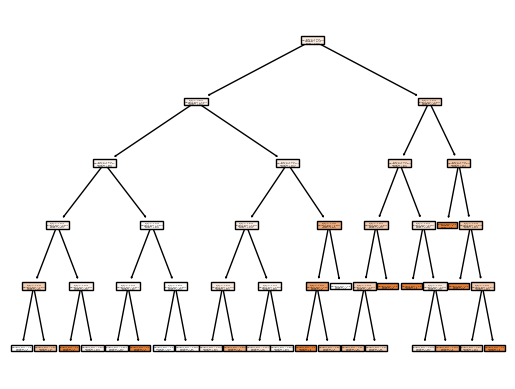

In [ ]:
# Process data:
y = NewTrainDF['TenYearCHD']
X = NewTrainDF.drop(['TenYearCHD'], axis=1)

# Fit decision tree:
cart = DecisionTreeRegressor(max_depth=5, min_samples_leaf=1) # Create a regressor object
cart = cart.fit(X, y) # Fit the regressor

# Visualize results:
plot_tree(cart,filled=True)

In [ ]:
# We can also test this regressor on the testing data:

X_test = NewTestDF.drop(['TenYearCHD'], axis=1)
y_test = NewTestDF['TenYearCHD']

## Make Predictions on the Test Set
y_hat = cart.predict(X_test)

## Confusion Matrix
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0]) # Compute Accuracy
#acc = np.trace(tab)/np.sum(np.sum(tab,axis=0)) # Faster way to compute accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

SSE = np.sum((y_test - y_hat)**2)
TSS = np.sum((y_test - np.mean(y))**2)
rsq = 1 - SSE/TSS
print('R^2: ' + str(rsq) + '\n')

Accuracy:  0.5471698113207547 

R^2: -0.0024047426182156606



At the purely surface level, the resulting decision tree model has come to be much simpler looking than the attempts at visualization seen above. However, the subsequent calculation of the accuracy and R^2 gave us figures of 55% and -.002 respectively, representing a step back from our earlier attempt at modeling before the k-means clustering. Possibly, the clusters that were calculated were representative of trends unique to the training data and not the test data. There remains a chance that there is a perfect figure between 15 and 5 that would not suffer from this issue, but we felt that would be outside the scope of this project.

# Conclusion

At its core, this project was intended as an exploration of different data modeling concepts, not an attempt to discover the best method. Somewhat predictably, this meant that even our best performing model is not something that would be considered ‘good’ by any metric. However, it does provide insight into the immense limitations with using k-means clustering within a decision tree model, and that the eventual number of clusters should be decided upon following its own, separate process.

It is also entirely possible that given the longitudinal nature of the study, our choice to remove any entry that lacked every parameter might have rendered the dataset too slimmed down to be of real use in the professional setting. Given its roots in 1948, it is entirely likely that at each execution of the study, not every data point was able to be gathered from every respondent.

Future iterations of this project, if undertaken in a serious manner, should focus upon identifying a couple of parameters of interest and not all fifteen. Ideally, such a step would be based upon proper medical hypotheses, a step that could better aid in designing the model itself, particularly in regards to what parameters to prioritize or sort by.